<!-- import necessary libraries -->

In [28]:
%pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 21.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 33.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


<!-- import necessary libraries -->

In [33]:
# import liabraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


<!-- read the file using pandas library -->

<!-- read the file -->

In [5]:
# read the file
df = pd.read_csv("alzheimers_disease_data.csv")

<!-- print top 10 rows of data -->

<!-- top 10 rows of the files -->

In [16]:
df.head()

PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0                   0  1.725883          0               0   
1                   0  2.592424          0               0   
2                   0  7.119548          0               1   
3                   1  6.481226          0               0   
4                   0  0.014691          0               0   

   PersonalityChanges  DifficultyCompletingTasks  Forgetfulness  Diagnosis  \
0                   0                          1              0          0   
1                   0                          0              1          0   
2                   0                          1              0          0   
3                   0                          0              0          0   
4                   1                          1              0          0   

   DoctorInCharge  
0       XXXConfid  
1       XXXConfid  
2       XXXConfid  
3       XXXConfid  
4       XXXConfid  

[5 rows x 35 columns]

In [7]:
df.shape

(2149, 35)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [9]:
df.describe()

PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2149.000000  2149.000000  2149.000000  2149.000000     2149.000000   
mean   5825.000000    74.908795     0.506282     0.697534        1.286645   
std     620.507185     8.990221     0.500077     0.996128        0.904527   
min    4751.000000    60.000000     0.000000     0.000000        0.000000   
25%    5288.000000    67.000000     0.000000     0.000000        1.000000   
50%    5825.000000    75.000000     1.000000     0.000000        1.000000   
75%    6362.000000    83.000000     1.000000     1.000000        2.000000   
max    6899.000000    90.000000     1.000000     3.000000        3.000000   

               BMI      Smoking  AlcoholConsumption  PhysicalActivity  \
count  2149.000000  2149.000000         2149.000000       2149.000000   
mean     27.655697     0.288506           10.039442          4.920202   
std       7.217438     0.453173            5.757910          2.857191   
min      15.008851     0.000000            0.002003          0.003616   
25%      21.611408     0.000000            5.139810          2.570626   
50%      27.823924     0.000000            9.934412          4.766424   
75%      33.869778     1.000000           15.157931          7.427899   
max      39.992767     1.000000           19.989293          9.987429   

       DietQuality  ...  FunctionalAssessment  MemoryComplaints  \
count  2149.000000  ...           2149.000000       2149.000000   
mean      4.993138  ...              5.080055          0.208004   
std       2.909055  ...              2.892743          0.405974   
min       0.009385  ...              0.000460          0.000000   
25%       2.458455  ...              2.566281          0.000000   
50%       5.076087  ...              5.094439          0.000000   
75%       7.558625  ...              7.546981          0.000000   
max       9.998346  ...              9.996467          1.000000   

       BehavioralProblems          ADL    Confusion  Disorientation  \
count         2149.000000  2149.000000  2149.000000     2149.000000   
mean             0.156817     4.982958     0.205212        0.158213   
std              0.363713     2.949775     0.403950        0.365026   
min              0.000000     0.001288     0.000000        0.000000   
25%              0.000000     2.342836     0.000000        0.000000   
50%              0.000000     5.038973     0.000000        0.000000   
75%              0.000000     7.581490     0.000000        0.000000   
max              1.000000     9.999747     1.000000        1.000000   

       PersonalityChanges  DifficultyCompletingTasks  Forgetfulness  \
count         2149.000000                2149.000000    2149.000000   
mean             0.150768                   0.158678       0.301536   
std              0.357906                   0.365461       0.459032   
min              0.000000                   0.000000       0.000000   
25%              0.000000                   0.000000       0.000000   
50%              0.000000                   0.000000       0.000000   
75%              0.000000                   0.000000       1.000000   
max              1.000000                   1.000000       1.000000   

         Diagnosis  
count  2149.000000  
mean      0.353653  
std       0.478214  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  

[8 rows x 34 columns]

<!-- check for missing values -->

In [10]:
df.isnull().mean()*100

PatientID                    0.0
Age                          0.0
Gender                       0.0
Ethnicity                    0.0
EducationLevel               0.0
BMI                          0.0
Smoking                      0.0
AlcoholConsumption           0.0
PhysicalActivity             0.0
DietQuality                  0.0
SleepQuality                 0.0
FamilyHistoryAlzheimers      0.0
CardiovascularDisease        0.0
Diabetes                     0.0
Depression                   0.0
HeadInjury                   0.0
Hypertension                 0.0
SystolicBP                   0.0
DiastolicBP                  0.0
CholesterolTotal             0.0
CholesterolLDL               0.0
CholesterolHDL               0.0
CholesterolTriglycerides     0.0
MMSE                         0.0
FunctionalAssessment         0.0
MemoryComplaints             0.0
BehavioralProblems           0.0
ADL                          0.0
Confusion                    0.0
Disorientation               0.0
Personalit

In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2144    False
2145    False
2146    False
2147    False
2148    False
Length: 2149, dtype: bool

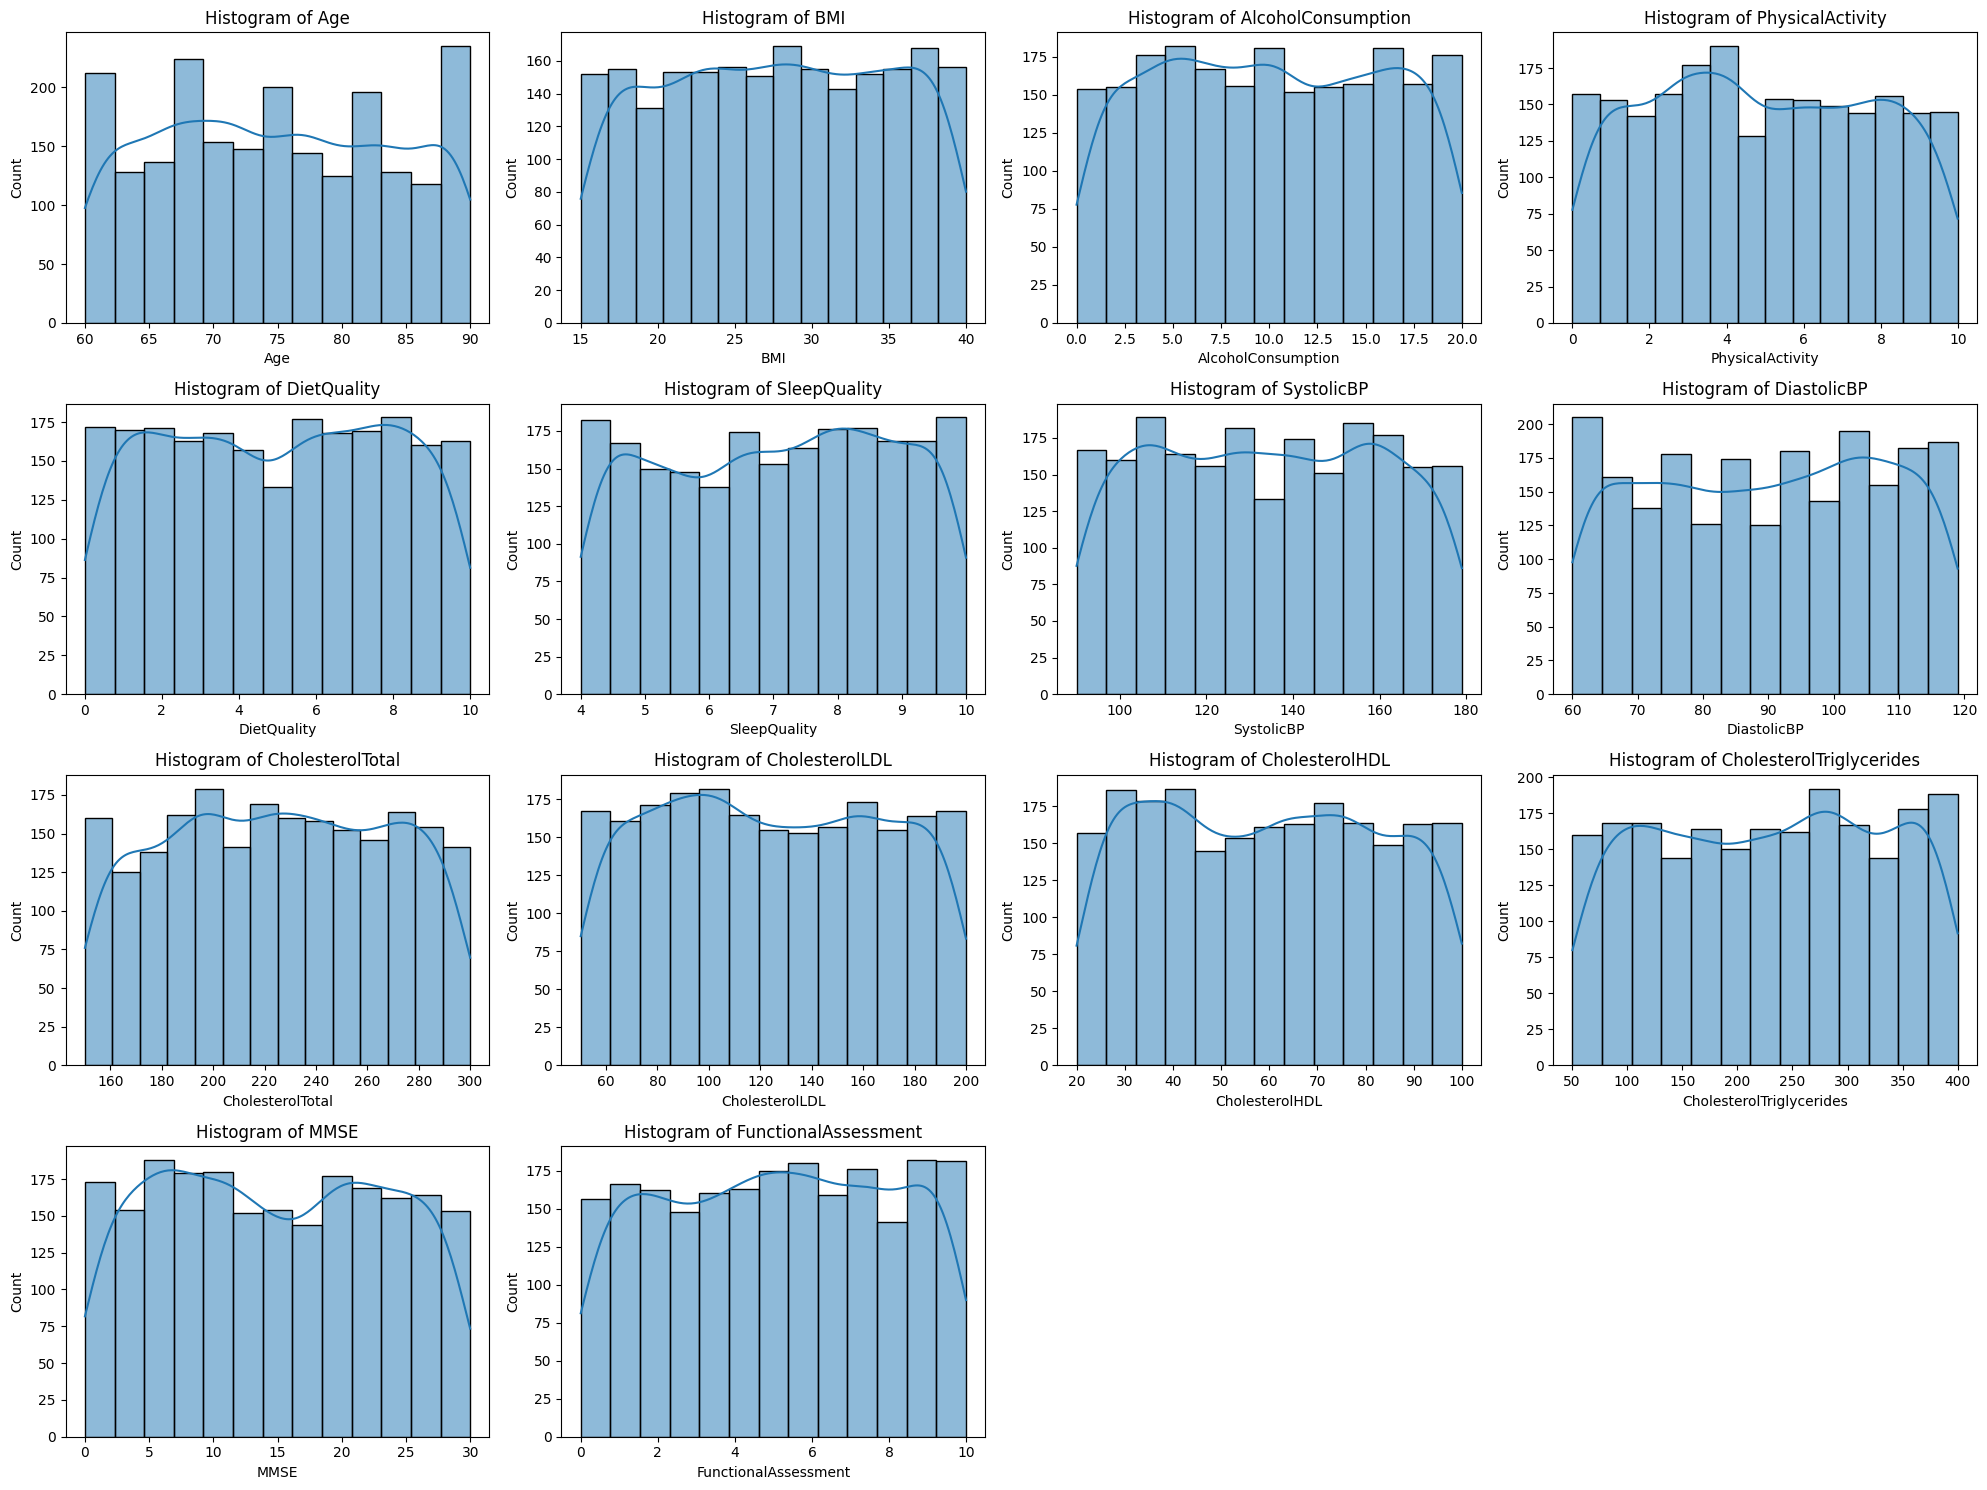

In [17]:
# define numerical features
numerical_features = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 
                      'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 
                      'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 
                      'MMSE', 'FunctionalAssessment']

# plot histogram for numerical features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

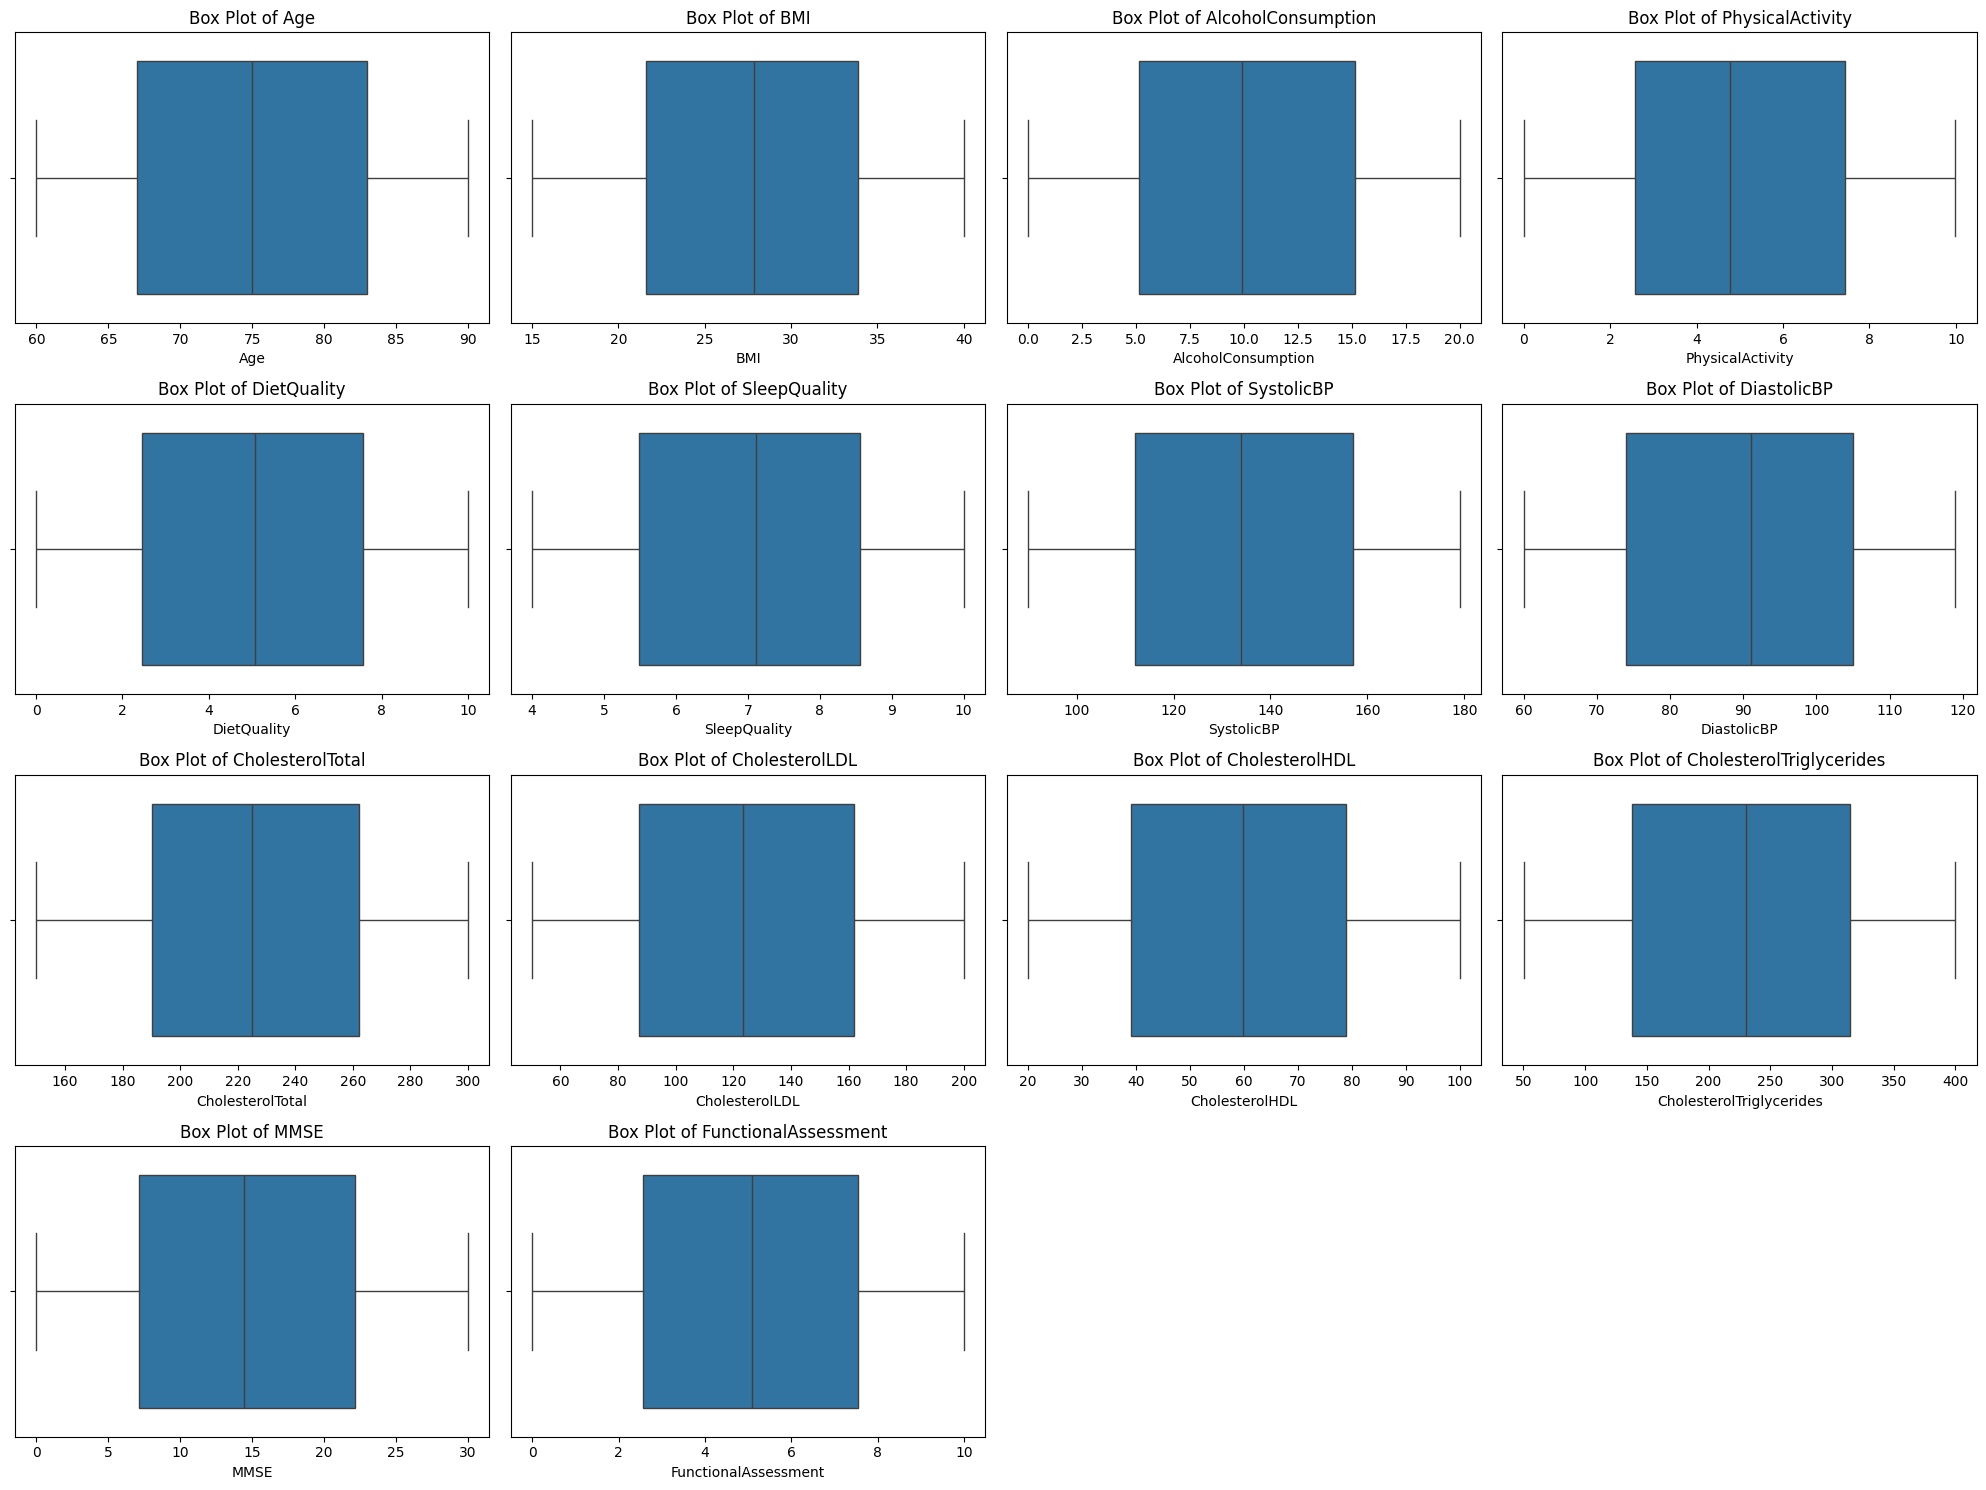

In [18]:
# Plot box plots for numerical features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

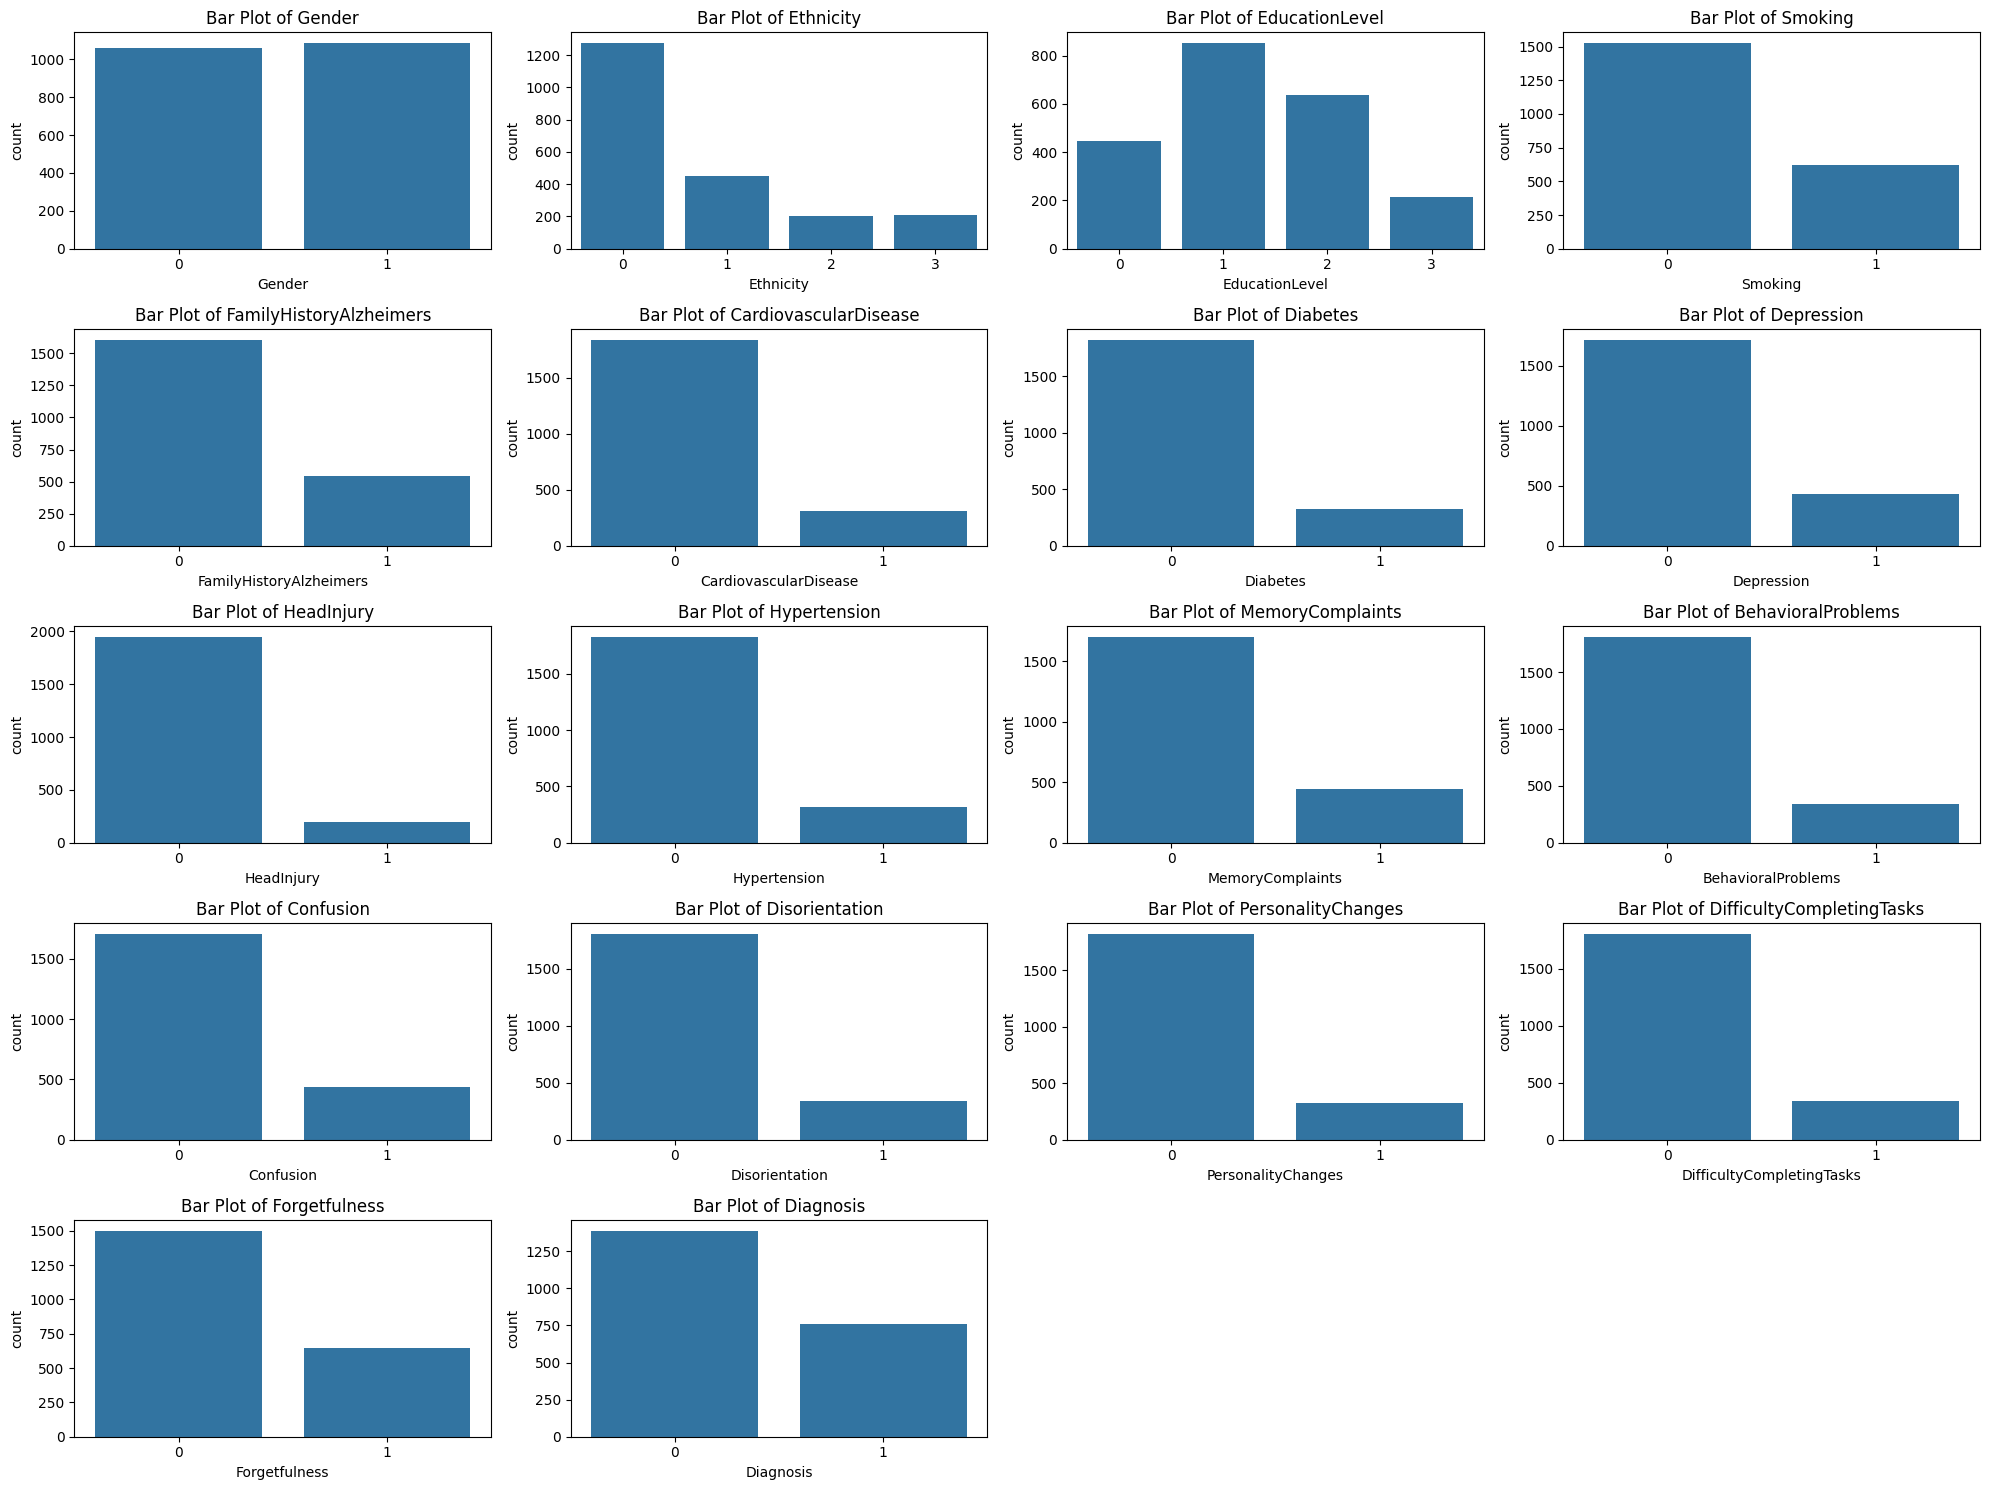

In [20]:
# Define categorical features
categorical_features = [
    'Gender', 'Ethnicity', 'EducationLevel', 'Smoking', 
    'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 
    'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 
    'BehavioralProblems', 'Confusion', 'Disorientation', 
    'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis'
]

# Plot bar plots for categorical features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 4, i)
    sns.countplot(x=df[feature])
    plt.title(f'Bar Plot of {feature}')
plt.tight_layout()
plt.show()


In [22]:
# compute correlation matrix
correlation_matrix = df[numerical_features].corr()

# display
print(correlation_matrix)

                               Age       BMI  AlcoholConsumption  \
Age                       1.000000 -0.015677            0.007323   
BMI                      -0.015677  1.000000           -0.008997   
AlcoholConsumption        0.007323 -0.008997            1.000000   
PhysicalActivity         -0.010249  0.000742            0.021696   
DietQuality              -0.023386  0.019922            0.020117   
SleepQuality              0.049139 -0.005975           -0.003873   
SystolicBP               -0.005324 -0.019275           -0.030070   
DiastolicBP              -0.004462 -0.002524           -0.008909   
CholesterolTotal          0.000392  0.001082           -0.033944   
CholesterolLDL            0.003588  0.023684           -0.017042   
CholesterolHDL            0.006803  0.038605           -0.001925   
CholesterolTriglycerides -0.003062 -0.018001            0.023362   
MMSE                     -0.004235 -0.003477           -0.011424   
FunctionalAssessment      0.005508 -0.030501    

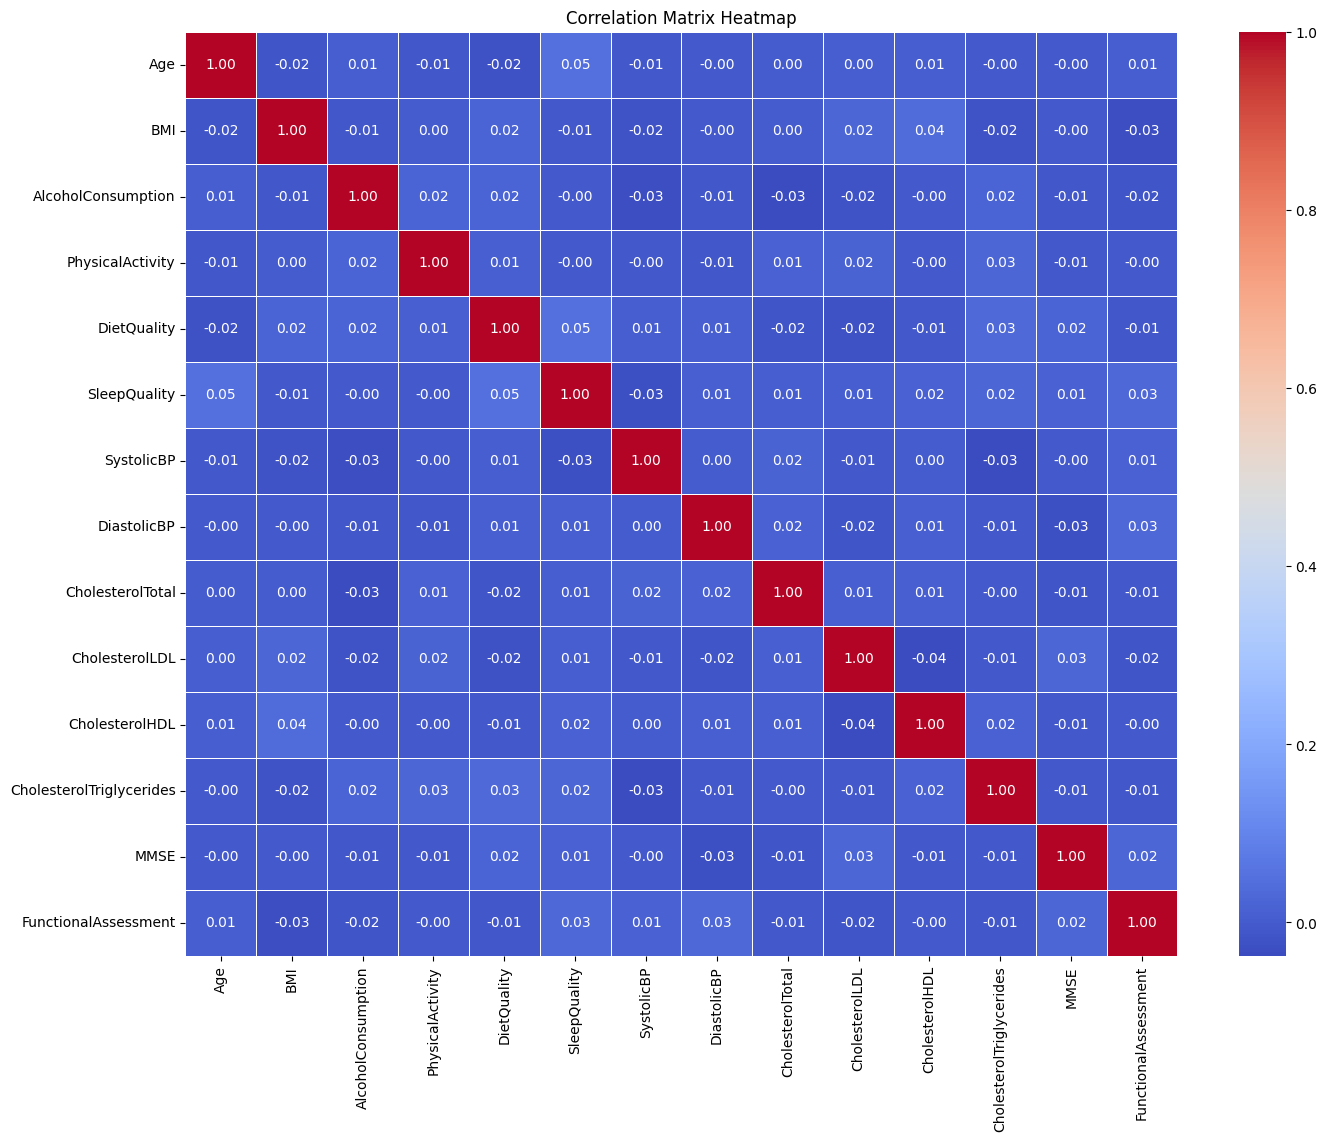

In [23]:
# visualize correlation matrix using heatmap
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

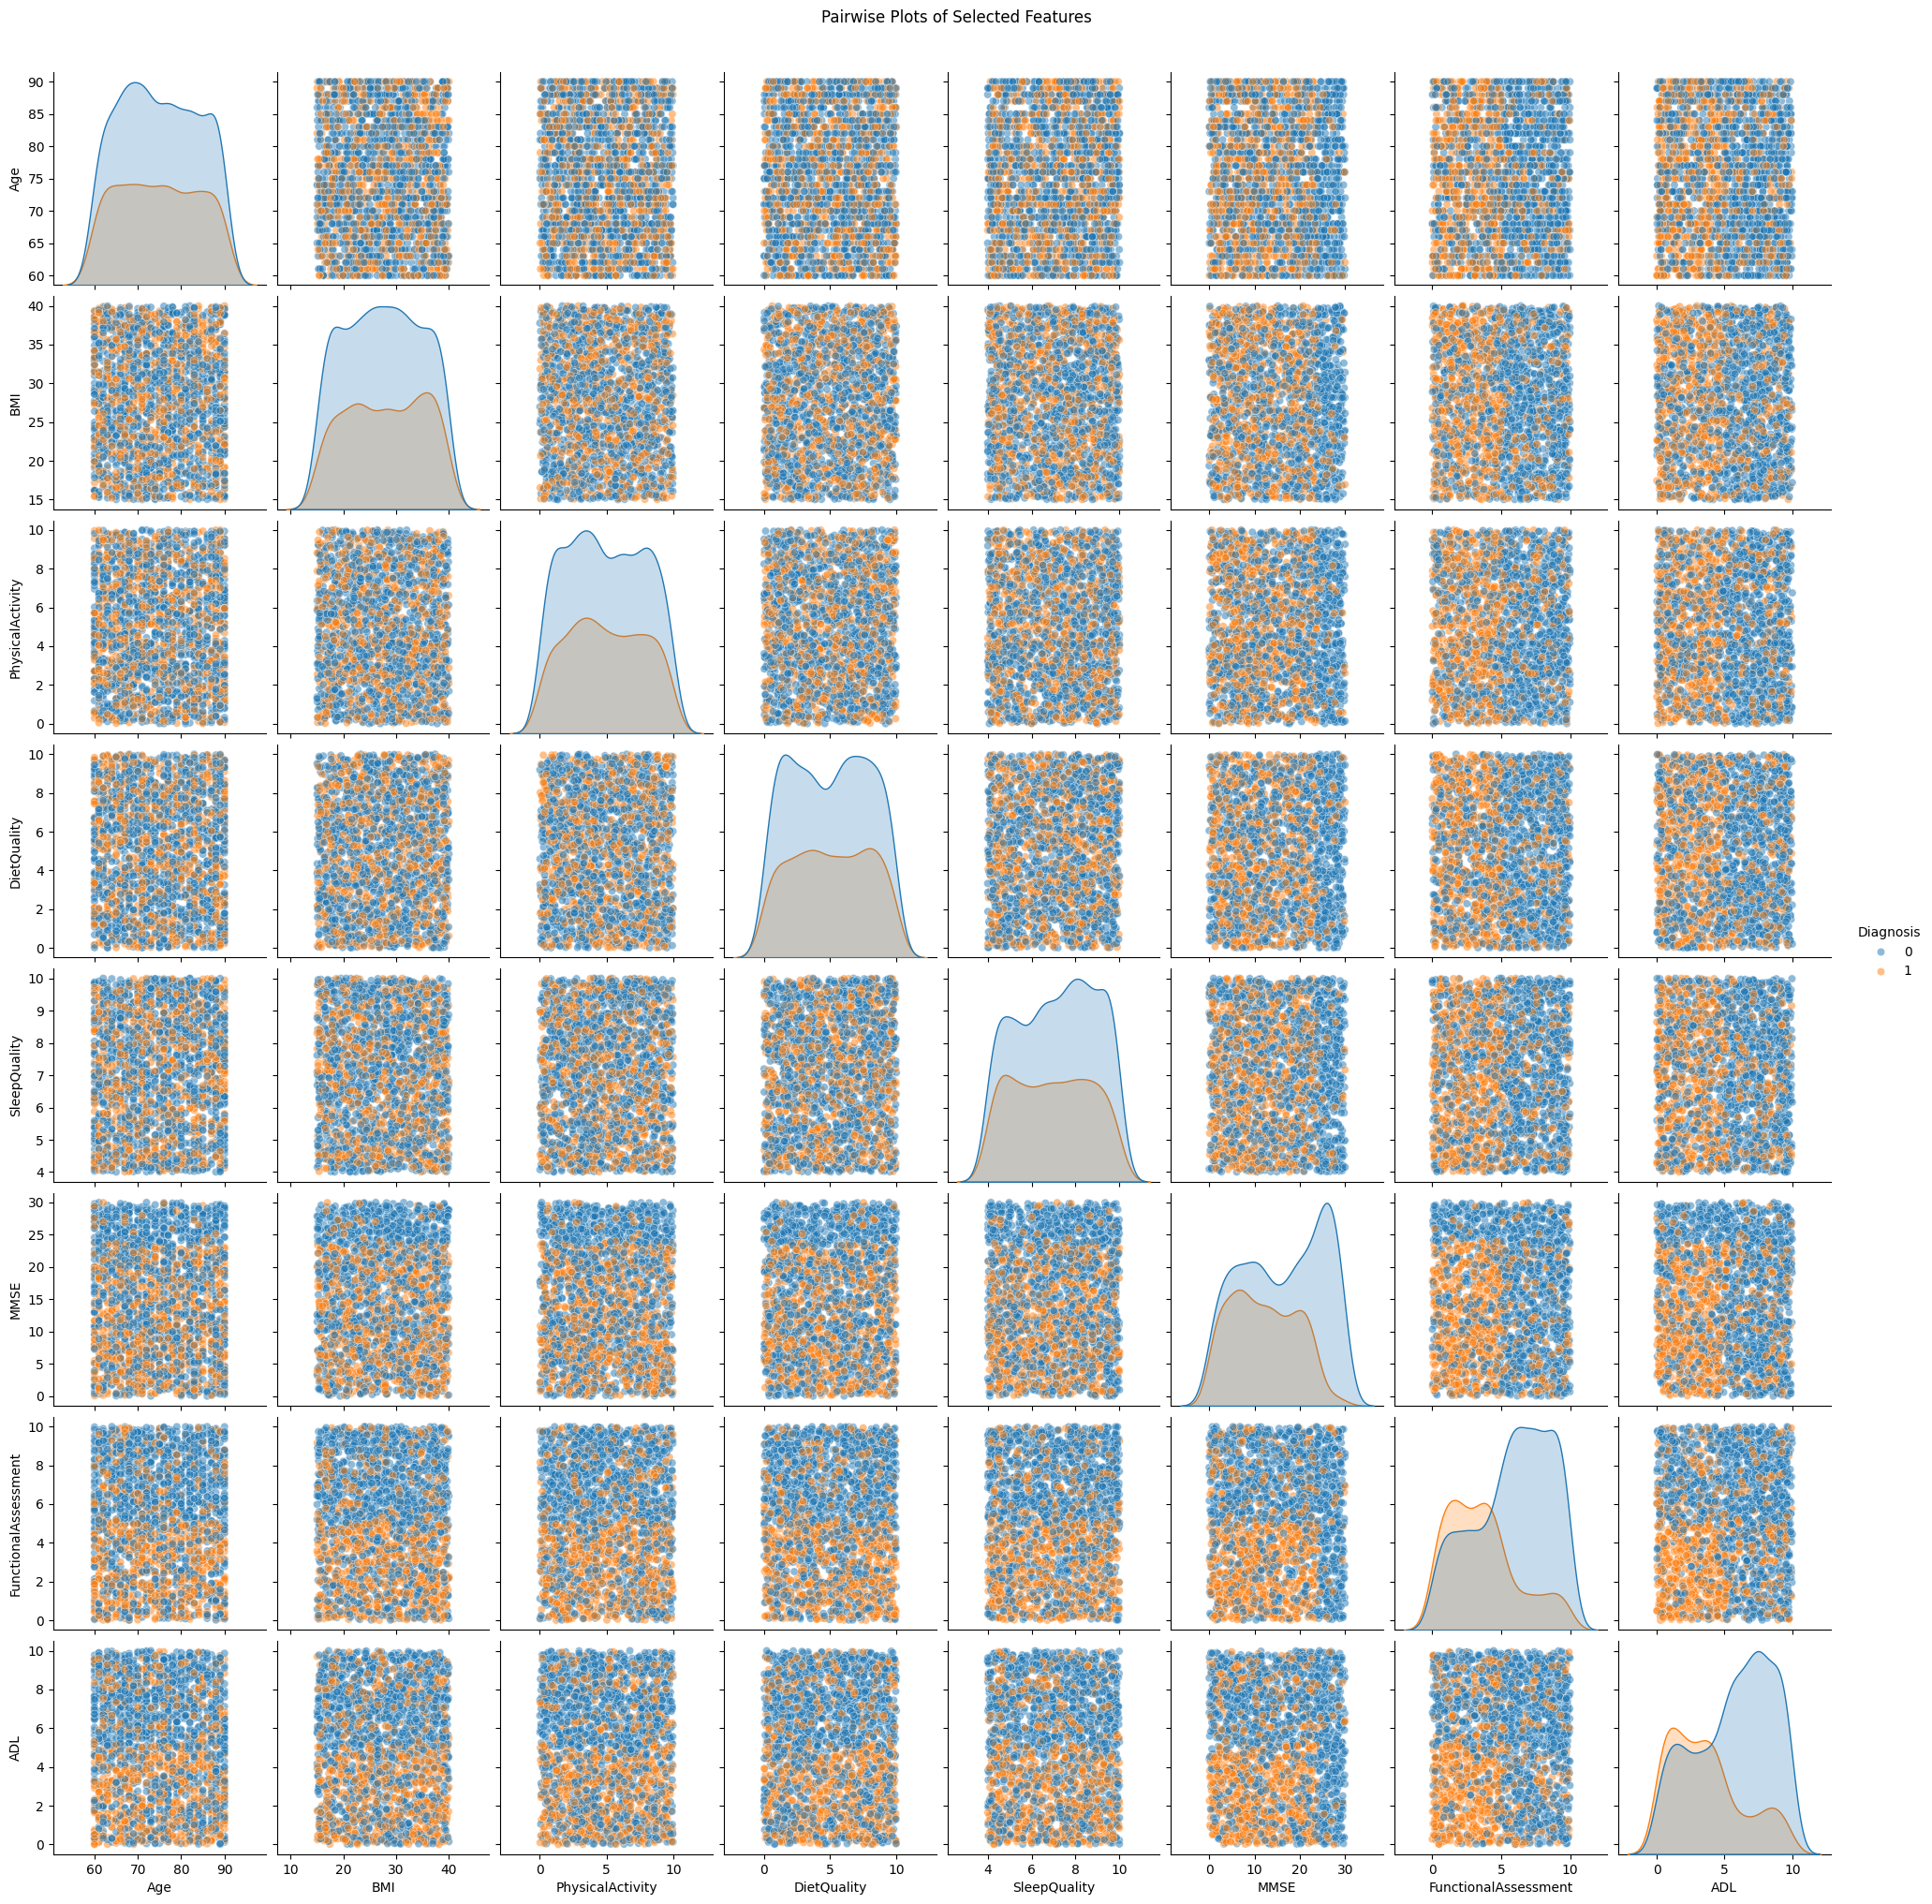

In [24]:
# Define a subset of features for the pairwise plot
features = [
    'Age', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
    'MMSE', 'FunctionalAssessment', 'ADL', 'Diagnosis'
]

# Create pairwise plots
sns.pairplot(df[features], hue='Diagnosis', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairwise Plots of Selected Features', y=1.02)
plt.show()

Missing values in each column:
 Age                         0
BMI                         0
PhysicalActivity            0
DietQuality                 0
SleepQuality                0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
MMSE                        0
dtype: int64
Mean Absolute Error (MAE): 7.404016636345982
Mean Squared Error (MSE): 72.83565326754935
R-squared (R2): -0.006348313249401327
                     Feature  Coefficient
0                        Age    -0.012283
1                        BMI     0.000006
2           PhysicalActivity    -0.020475
3                DietQuality     0.046760
4               SleepQuality     0.104211
5                 SystolicBP     0.002440
6                DiastolicBP    -0.018996
7           CholesterolTotal    -0.000996
8             CholesterolLDL     0.004359
9             CholesterolHDL     0.001321
10  Ch

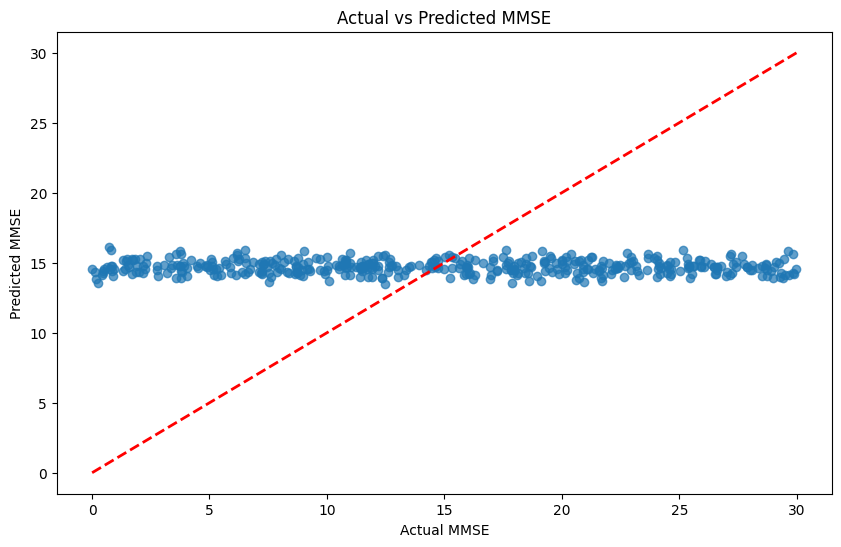

In [36]:
# Define features and target variable
features = [
    'Age', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
    'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 
    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides'
]
target = 'MMSE'

# Check for missing values
print("Missing values in each column:\n", df[features + [target]].isnull().sum())

# Drop rows with missing values in the selected columns
data = df.dropna(subset=features + [target])

# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Analyze regression coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
print(coefficients)

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual MMSE')
plt.ylabel('Predicted MMSE')
plt.title('Actual vs Predicted MMSE')
plt.show()